<a href="https://colab.research.google.com/github/NbtKmy/gc_workshops/blob/main/YOLO_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO v8

Wir schauen zuerst die Beschreibung des Projekts:
>YOLO (You Only Look Once), a popular object detection and image segmentation model, was developed by Joseph Redmon and Ali Farhadi at the University of Washington. Launched in 2015, YOLO quickly gained popularity for its high speed and accuracy.


(Die Beschreibung aus dem offiziellen Dokument [hier](https://docs.ultralytics.com/))

Die Version 8 von YOLO kam im Jan. 2023. Das neue Modell kann nicht nur Gegenstandserkennung, sondern es besitzt auch weitere Funktionen. Heute probieren wir auch diese Funktionen aus.

## Installation

Wenn man YOLO nur ausprobieren will, ist die Installation ziemlich einfach... nur eine Zeile:

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.6/613.6 kB 10.0 MB/s eta 0:00:00


... Wenn man von dem Github-Repository YOLO installieren will:

```
!git clone https://github.com/ultralytics/ultralytics.git
!cd ultralytics && pip install -r requirements.txt
```



## Überprüfen, ob YOLO richtig installiert ist

In Colab-Notebook kann man entweder durch Command in Command Line oder durch Python-Code überprüfen, ob YOLO richtig installiert ist.

In [ ]:
!yolo version

8.0.169


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (AMD EPYC 7B12)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/225.8 GB disk)


## Beispiel: Prediction durch CLI (Command Line Interface)



In [ ]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 6.23M/6.23M [00:00<00:00, 78.0MB/s]
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (AMD EPYC 7B12)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 165k/165k [00:00<00:00, 6.65MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 218.4ms
Speed: 16.3ms preprocess, 218.4ms inference, 25.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


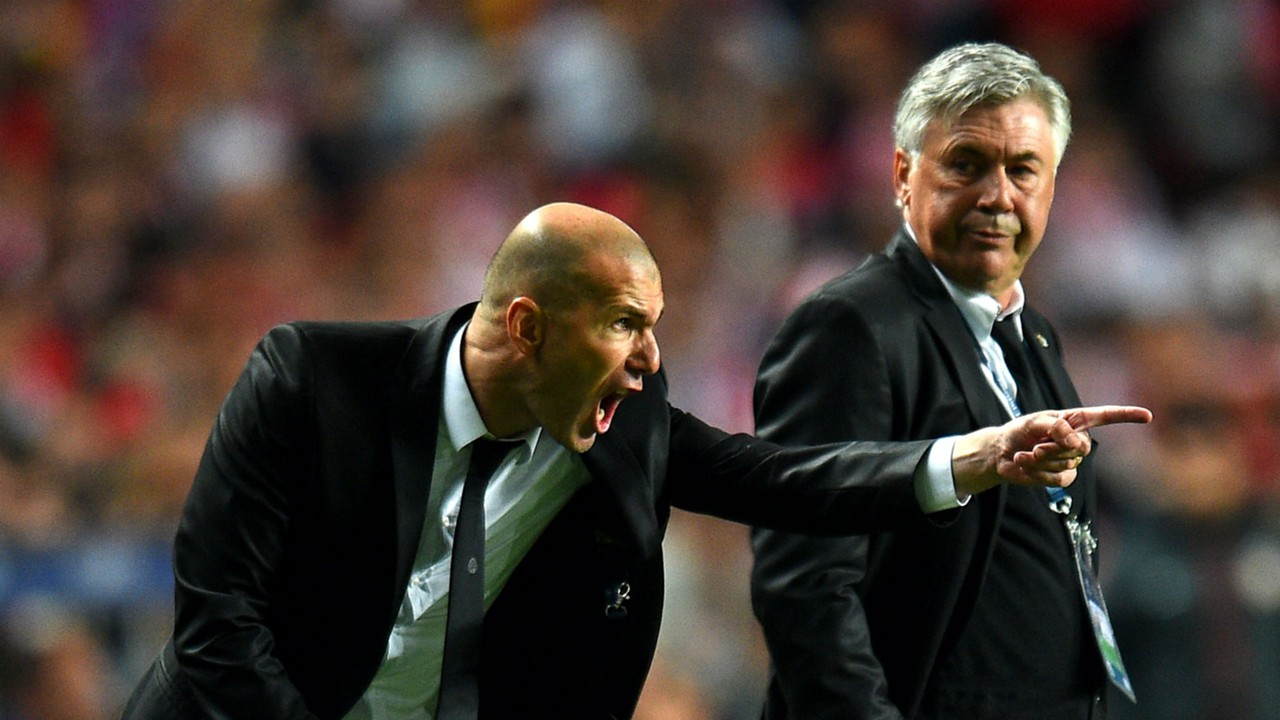

In [ ]:
from PIL import Image

im_orig = Image.open("zidane.jpg")
im_orig

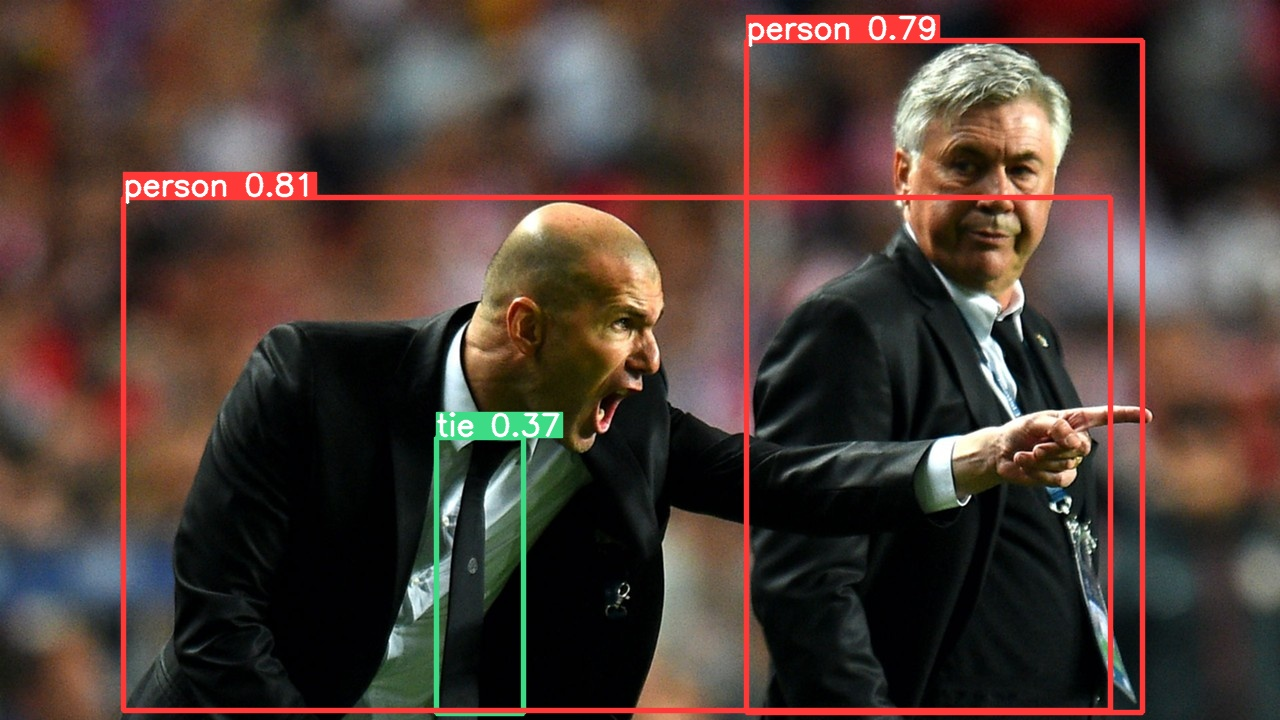

In [ ]:
im_result = Image.open("./runs/detect/predict/zidane.jpg")
im_result

## YOLO ausführen durch Python-Code

Was wir jetzt durch CLI gemacht haben, kann man natürlich mit Python-Code auch ausführen.

Es ist eigentlich nicht so schwierig...

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image

img_zidane = Image.open("zidane.jpg")

model = YOLO("yolov8n-pose.pt")
results = model.predict(img_zidane, save=True, imgsz=320, conf=0.5)



0: 192x320 2 persons, 46.4ms
Speed: 0.9ms preprocess, 46.4ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs/pose/predict


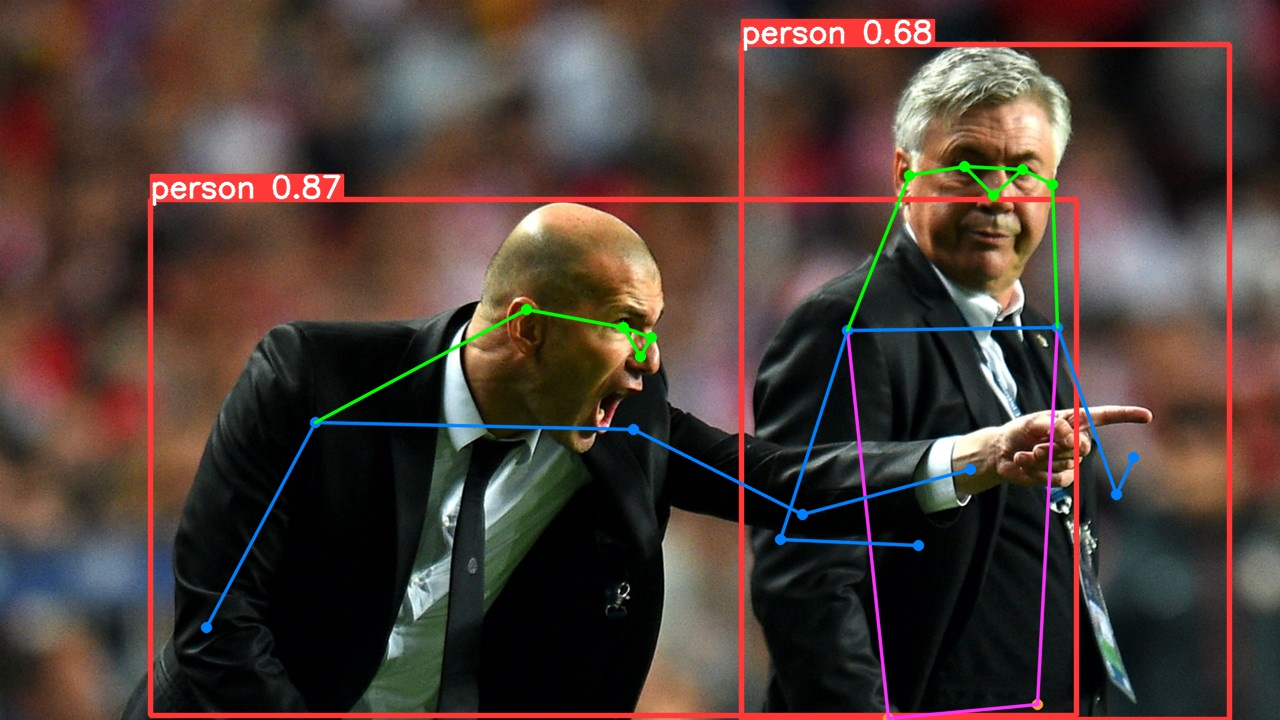

In [ ]:
im_result2 = Image.open("./runs/pose/predict/zidane.jpg")
im_result2

... Genau! YOLO kann nicht nur die Personen, sondern auch die Haltungen erkennen.

YOLOv8 kann 5 Tasks erledigen. Es sind:

1. Classify ([...]-cls)
1. Detect ([...])
1. Segment ([...]-seg)
1. Track (wird durch "model.track"-Methode eingesetzt)
1. Pose ([...]-pose)

In [...]-Teil kommt ein von den folgenden Modell hinein:
`YOLOv8n, YOLOv8s, YOLOv8m, YOLOv8l, YOLOv8x`

Der Unterschied zwischen den Modellen ist auf der [README](https://github.com/ultralytics/ultralytics) vom Github-Repository beschrieben.



In [ ]:
!ffmpeg -version

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-l

In [ ]:
!pip install -q yt-dlp

In [ ]:
from yt_dlp import YoutubeDL

yt_url = 'https://youtu.be/52kC2KKpUT0'
vd_filename = 'yolo_test.mp4'

start = 0.0
end = 5.0

ffmpeg_args = {
  "ffmpeg_i": ["-ss", str(start), "-to", str(end)]
}

ydl_opts = {'format': 'best',
            'outtmpl': vd_filename,
            'external_downloader': 'ffmpeg',
            'external_downloader_args': ffmpeg_args}
with YoutubeDL(ydl_opts) as ydl:
    ydl.download([yt_url])

[youtube] Extracting URL: https://youtu.be/52kC2KKpUT0
[youtube] 52kC2KKpUT0: Downloading webpage
[youtube] 52kC2KKpUT0: Downloading ios player API JSON
[youtube] 52kC2KKpUT0: Downloading android player API JSON
[youtube] 52kC2KKpUT0: Downloading m3u8 information
[info] 52kC2KKpUT0: Downloading 1 format(s): 22
[download] Destination: yolo_test.mp4
[download] 100% of  242.98KiB in 00:00:00 at 398.01KiB/s


In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open(vd_filename, 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="100%" height="100%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt')
results = model.track(source="yolo_test.mp4", save=True)

In [ ]:
# Von avi zu mp4 - Ordner & File-Name anpassen!
!ffmpeg -i ./runs/detect/predict3/yolo_test.avi yolo_test_result.mp4

from IPython.display import HTML
from base64 import b64encode

mp4 = open('yolo_test_result.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="100%" height="100%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

## Aufgabe

Probier YOLO aus!
Zuerst ein beliebiges Bild mit YOLO analysieren.
Wenn es sicher ist, dann "Track"-Funktion verwenden, um ein kurzes Video zu analysieren.
